# Multivariate time series prediction

In [1]:
%matplotlib inline

Load data:

In [2]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('./data/raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('./data/pollution.csv',compression='gzip')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


Let's take a look at the time series:

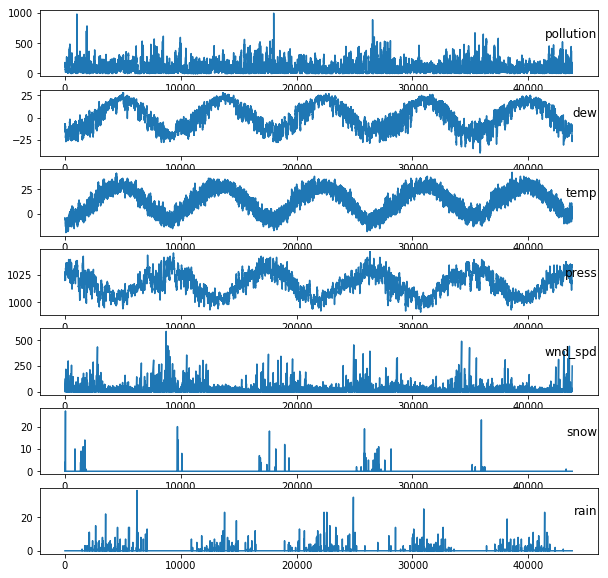

In [3]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('./data/pollution.csv', compression='gzip', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure(figsize=(10,10))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [4]:
dataset.columns[0]

'pollution'

## Exercise 1

Orginize the data (Please remember that Input data must have the following structure: **[n_samples,n_times,n_features]**) to predict the air pollution based on the past values of pollution and the past values of the other time series included in the DataFrame. Take a look to the function "create_dataset" used in the 4.1 notebook of the course, and use it to build the new function. Pay attention to:

- In this case, n_features corresponds to the number of time series used to make predictions.
- The function to format the data must have two parameters, the number of times back and the number of times to predict.



## Exercise 2

Create thre models one based on conventional RNNs, one based on LSTM and a last one based on GRU units. Compare the performance of the models predicting one step forward. For all the models use one recurrent layer with 50 neurons.

In [ ]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)


Text(0.5,1,'Performance using RNN')

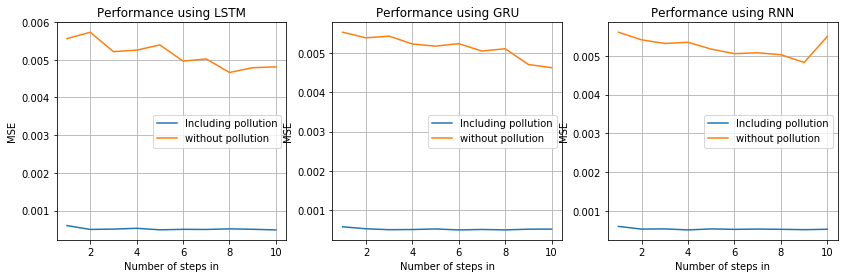

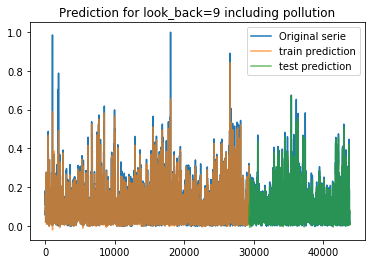

In [40]:
LSTM

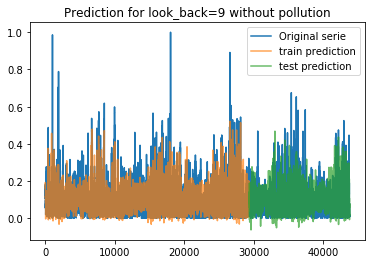

In [42]:
LSTM

## Excercise 3

Create one model based on LSTM cells to predict air pollution [3,6,12] times ahead. Create a regular architecture and use the walk forward approach to make the predictions. Use a network with one LSTM layer of 50 cells.

In [ ]:
seed(1)
set_random_seed(2)


Text(0.5,1,'Performance prediction for 3 times ahead using walk forward strategy')

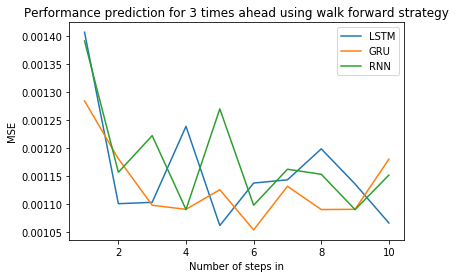

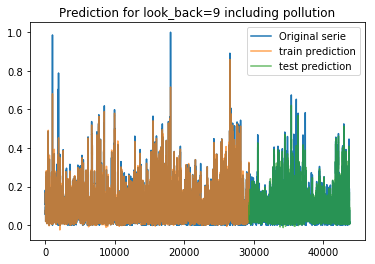

## Excercise 4

Create an Encoder-Decoder architecture to solve the sample problem than in the former excersice and compare the results. Use an encoder with one LSTM layer of 50 cells and a decoder with one layer of 10 cells.

In [ ]:
seed(1)
set_random_seed(2)



Text(0.5,1,'Performance prediction for 3 times ahead using encoder-decoder architecture')

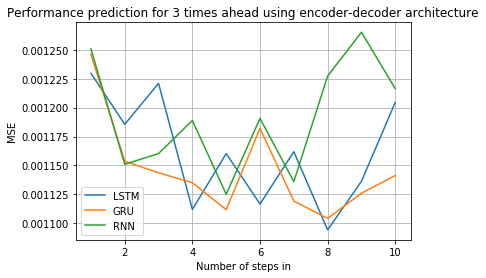

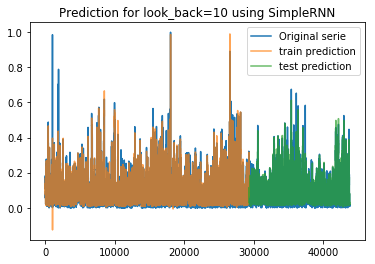